# 1/ Adversarial training of linear models versus weight decay

In [1]:
from Adversarial_vs_weight_decay.utils import extract_from_mnist, visualize_data
from Adversarial_vs_weight_decay.train import prep_data,create_model,training_loop,eval_test,eval_train, plot_losses,visualize_weights_and_signs
from Adversarial_vs_weight_decay.adv_attack import adv_attack,create_adv_test

## 1.1 Logistic regression

### Data Extraction

In [2]:
filtered_data = extract_from_mnist() # to extract the 3s and 7s from the MNIST dataset

Filtered dataset shape: (14434, 785)
Labels: 0        3
1        3
2        3
3        7
4        3
        ..
14429    3
14430    7
14431    3
14432    7
14433    3
Name: target, Length: 14434, dtype: int64


### Data preparation and model creation

In [3]:
X_train_tensor,y_train_tensor,X_val,y_val,X_test_tensor,y_test_tensor,num_classes= prep_data(filtered_data)
# to prepare the data for the training

Unique classes in target labels: 2


In [4]:
model,criterion, optimizer =create_model(X_train_tensor,num_classes,lr = 0.005)
# to create the linear model and get the criterion and optimizer


### Training Loop and performance 

In [5]:
training_loss ,val_losses,model_trained = training_loop(optimizer, model, criterion, X_train_tensor, y_train_tensor,X_val,y_val,num_epoch=120,batch_size=64)
# to train the model

Epoch [1/120], Training Loss: 0.1078, Validation Loss: 0.0756
Epoch [2/120], Training Loss: 0.0449, Validation Loss: 0.0610
Epoch [3/120], Training Loss: 0.0460, Validation Loss: 0.0530
Epoch [4/120], Training Loss: 0.0189, Validation Loss: 0.0496
Epoch [5/120], Training Loss: 0.0297, Validation Loss: 0.0472
Epoch [6/120], Training Loss: 0.0087, Validation Loss: 0.0457
Epoch [7/120], Training Loss: 0.0226, Validation Loss: 0.0450
Epoch [8/120], Training Loss: 0.0422, Validation Loss: 0.0415
Epoch [9/120], Training Loss: 0.0114, Validation Loss: 0.0411
Epoch [10/120], Training Loss: 0.0070, Validation Loss: 0.0397
Epoch [11/120], Training Loss: 0.1528, Validation Loss: 0.0391
Epoch [12/120], Training Loss: 0.0151, Validation Loss: 0.0395
Epoch [13/120], Training Loss: 0.0111, Validation Loss: 0.0386
Epoch [14/120], Training Loss: 0.0176, Validation Loss: 0.0384
Epoch [15/120], Training Loss: 0.0165, Validation Loss: 0.0373
Epoch [16/120], Training Loss: 0.0131, Validation Loss: 0.0373
E

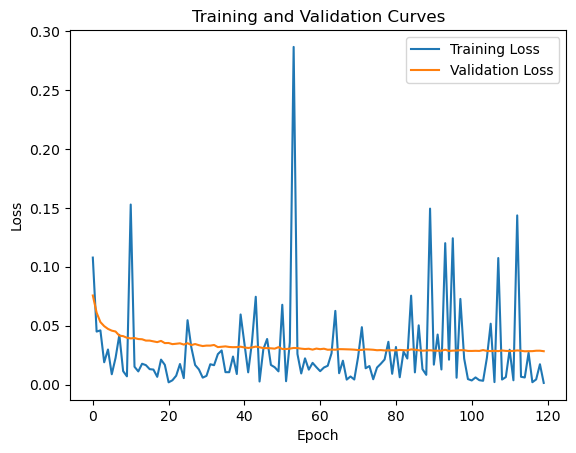

In [6]:
plot_losses(training_loss,val_losses) # to plot the training loss

In [7]:
eval_train(X_train_tensor,y_train_tensor,model_trained) # to evaluate the model on the training set

Training Accuracy: 99.23%


### Weight Visualisation

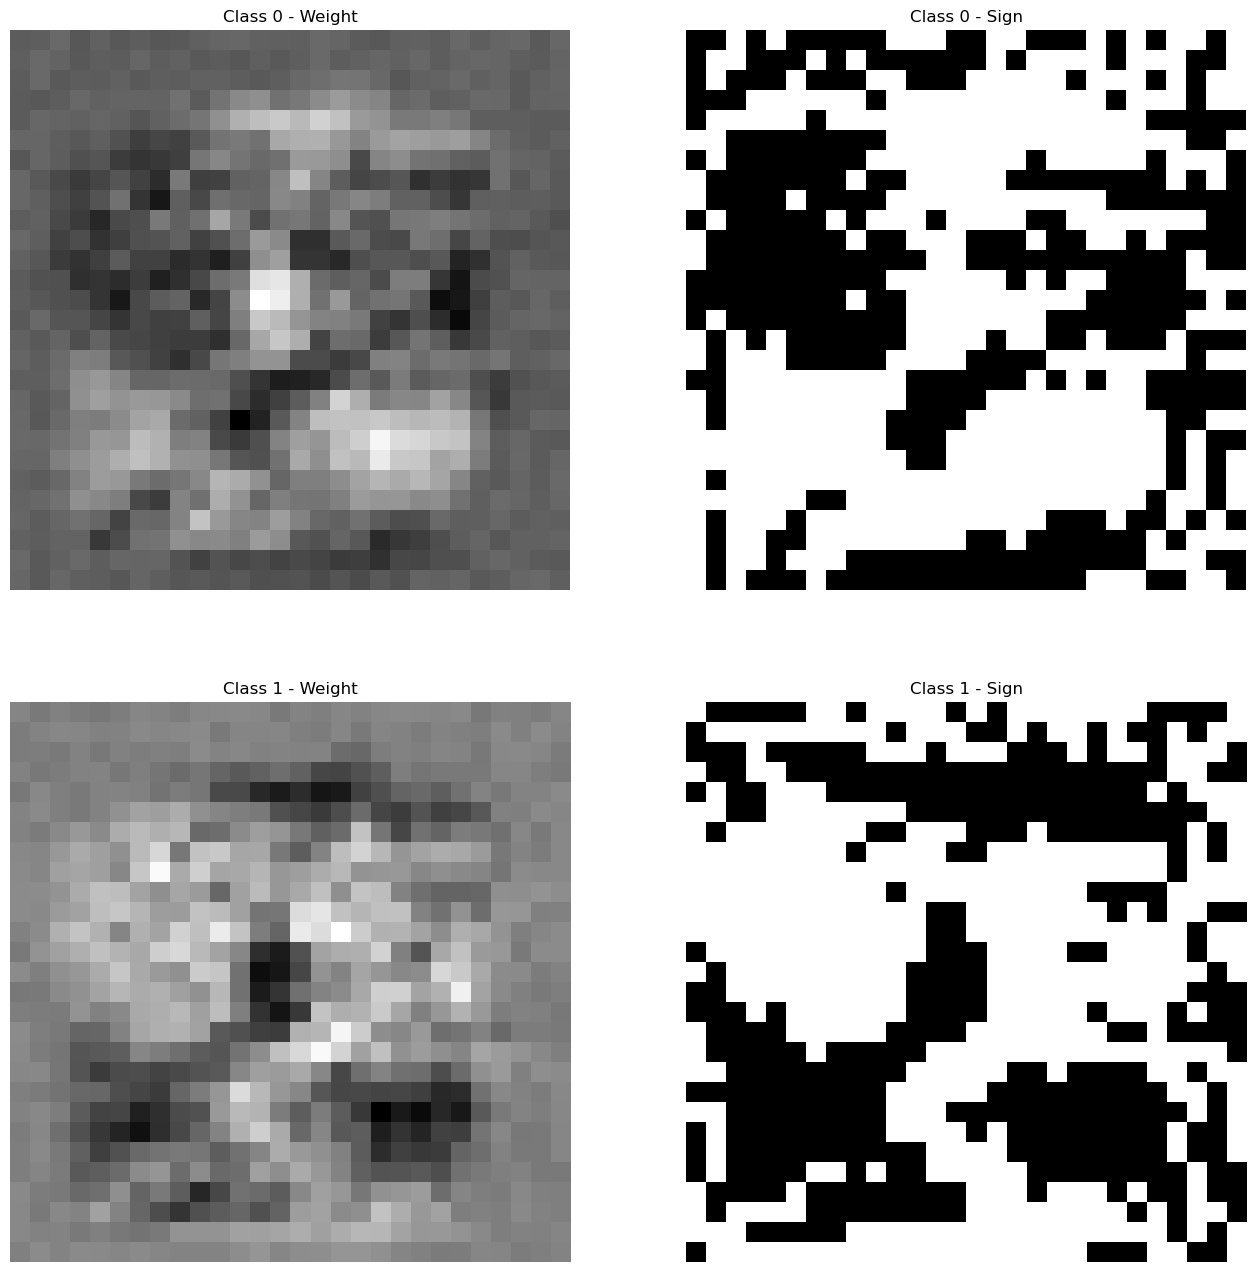

In [8]:

visualize_weights_and_signs(model_trained) # to visualize the weights and signs of the model

## 1.2 Logistic regression Vs Adversarial

### Test set for original images

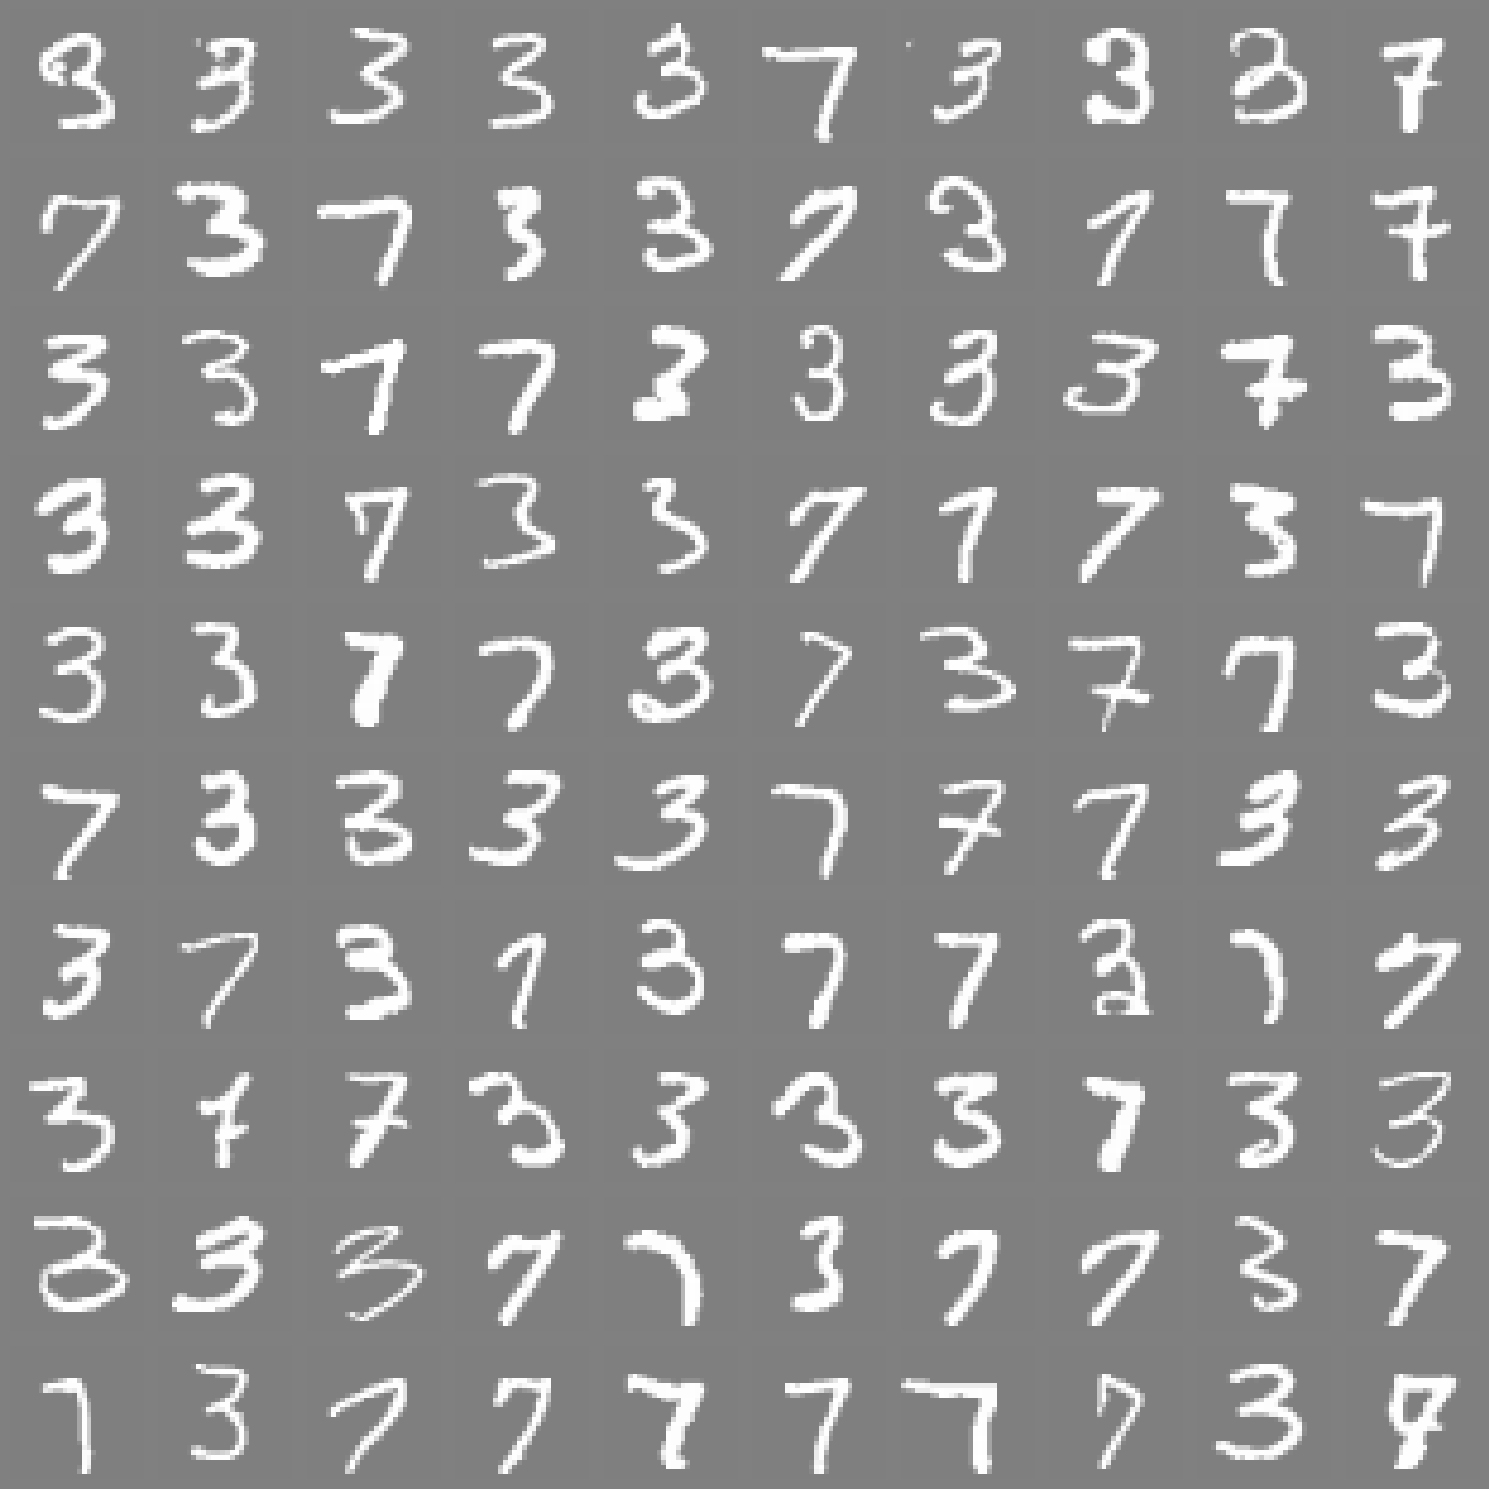

In [9]:
num_rows = 10
num_cols = 10
X_test_tensor2 = X_test_tensor.detach().numpy()
visualize_data(num_rows,num_cols,X_test_tensor2) # to visualize the test data

### Evaluation of the model on the unaltered test set

In [10]:
eval_test(X_test_tensor,y_test_tensor,model_trained) # to evaluate the model on the test set

Accuracy: 98.41%
Mean Confidence for All Examples: 0.9876
Mean Confidence for Incorrect Predictions: 0.8453


### Creation of the adversarial test set

In [11]:
eps = 0.25
X_test_tensor_adv = create_adv_test(model_trained,X_test_tensor,y_test_tensor,eps,criterion) # to create the adversarial test set

/home/spi-2019/Téléchargements/Tpworkspace/MLA_proj/Adversarial_vs_weight_decay/adv_attack.py:36: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  alt_im_norm =torch.tensor(alt_im, dtype=torch.float32)


### Visualization of the altered test set 

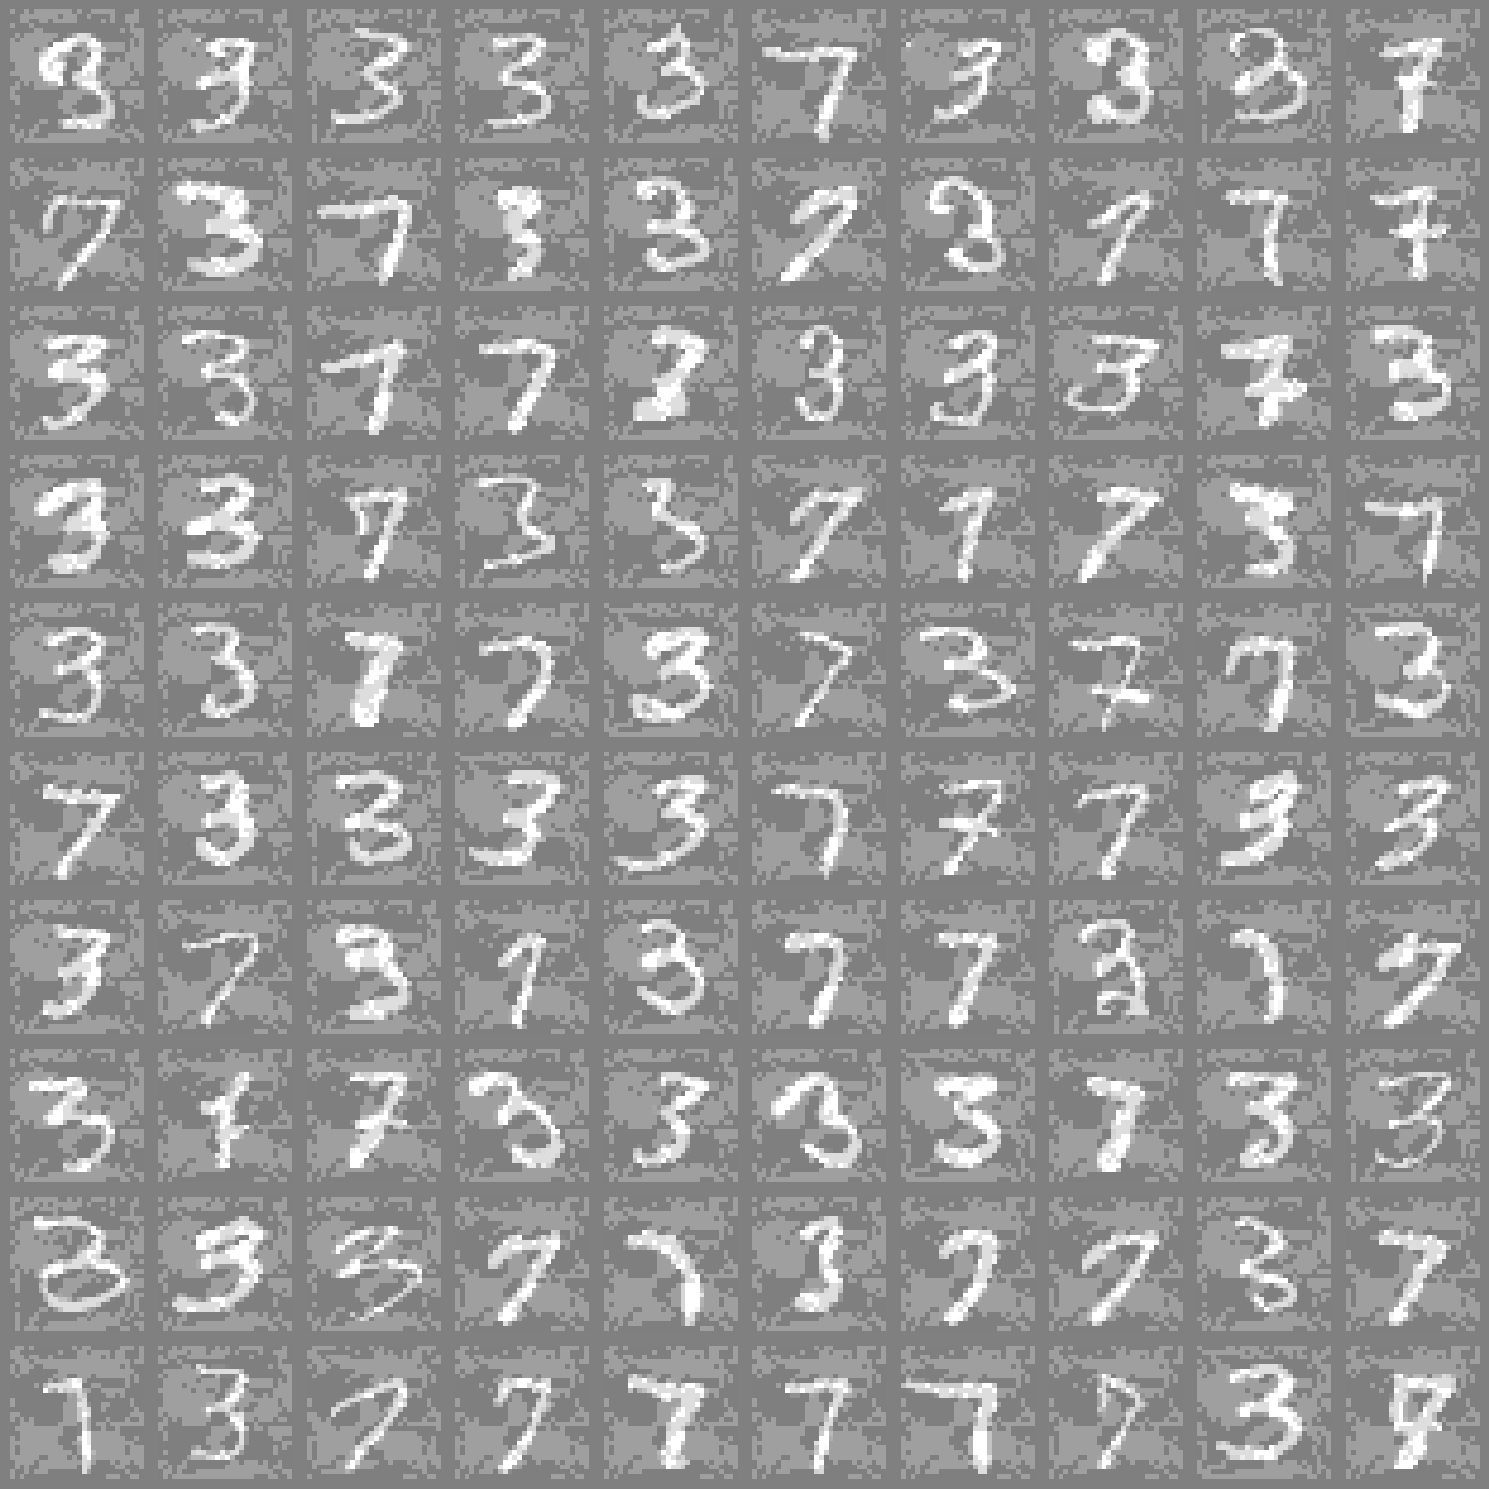

In [12]:
X_test_tensor_adv2 = X_test_tensor_adv.detach().numpy()
visualize_data(num_rows,num_cols,X_test_tensor_adv2) # to visualize the adversarial test set

### Evaluation of the model on the altered test set 

In [13]:
eval_test(X_test_tensor_adv,y_test_tensor,model_trained) # to evaluate the model on the adversarial test set

Accuracy: 0.14%
Mean Confidence for All Examples: 0.9967
Mean Confidence for Incorrect Predictions: 0.9967


# 2/ Adversarial learning in deep neural networks

In [15]:
import deep_neural.methodes as methodes
from torch.utils.data import DataLoader
from torchvision import datasets
import torch.nn as nn
import torch
from deep_neural.adv_attack import create_adv_test

## 2.1 Préparation des données

In [16]:
#on créé une transform normale et une transoform avec bruit
transform = methodes.transform_tensor(noise=False)
transform_noise = methodes.transform_tensor(noise=True)


training_data = datasets.MNIST(
    root="data",
    train=True,
    download=True,
    transform=transform
)

test_data = datasets.MNIST(
    root="data",
    train=False,
    download=True,
    transform=transform
)

training_data_noised = datasets.MNIST(
    root="data",
    train=True,
    download=True,
    transform=transform_noise
)

batch_size = 64
training_dataloader = DataLoader(training_data, batch_size=batch_size, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=batch_size, shuffle=True)
training_dataloader_noised = DataLoader(training_data_noised, batch_size=batch_size, shuffle=True)


## 2.2 Définition du modèle et entrainement

In [ ]:
#je définis le deep neural network maxout avec 240 unités par couche
DNN_240 = methodes.define_model(model=240)

#on réalise dans un premier temps un entrainement normal sans attaque
DNN_240_normal_training=methodes.train_loop(training_dataloader, DNN_240, epsilon=0.1, alpha=0.5, adv_loss=False,)

#on réalise ensuite un entrainement avec attaque
DNN_240_adv_training=methodes.train_loop(training_dataloader, DNN_240, epsilon=0.1, alpha=0.5, adv_loss=True,)

#enfin on réalise un entrainement sur une base d'entraînement bruitée
DNN_240_noised_training=methodes.train_loop(training_dataloader_noised, DNN_240, epsilon=0.1, alpha=0.5, adv_loss=True)

## 2.3 Création d'images adversariales et test

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
#on récupère les images et les labels de la base de test
x_test = torch.cat([images for images, labels in test_dataloader]).to(device) #images de la base test
y_test = torch.cat([labels for images, labels in test_dataloader]).to(device) #labels de la base test

eps = 0.1
loss_func = nn.CrossEntropyLoss()

#création des images adverses pour le réseau  à 240 unites et une normale loss
altered_test_240U = create_adv_test(DNN_240_normal_training, x_test, y_test, eps, loss_func)

#création des images adverses pour le réseau  à 240 unites et une loss adversariale
altered_test_240U_adv = create_adv_test(DNN_240_adv_training, x_test, y_test, eps, loss_func, adv_loss=True)

#création des images adverses pour le réseau  à 240 unites et une loss adversariale sur une base d'entrainement bruitée
altered_test_240U_noised = create_adv_test(DNN_240_noised_training, x_test, y_test, eps, loss_func, adv_loss=True)

# 3/ Essais sur RBF

In [17]:
from RBF.utils import extract_from_mnist, visualize_data
from RBF.train import prep_data,create_model,training_loop,eval_test,eval_train, plot_losses,visualize_weights_and_signs
from RBF.adv_attack import adv_attack,create_adv_test
from RBF.RBF_architecture import ShallowRBF, RbfNet2
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_openml
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
from matplotlib.colors import LinearSegmentedColormap
from sklearn.preprocessing import LabelEncoder
from torch.autograd import Variable

## 3.1 RBF network

### Data Extraction


In [18]:
data = extract_from_mnist()

Filtered dataset shape: (20000, 785)
Labels: 0        8
1        4
2        8
3        7
4        7
        ..
19995    8
19996    3
19997    1
19998    7
19999    6
Name: target, Length: 20000, dtype: int64



### Data preparation and model creation


In [19]:
X_train_tensor,y_train_tensor,X_test_tensor,y_test_tensor,num_classes = prep_data(data)

Unique classes in target labels: 10


In [20]:
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, 64, shuffle=True)

In [22]:
# Hyperparameters
num_epochs = 200
learning_rate = 0.001
momentum = 0.9
Batch_size = 128
num_classes = 10
input_size = 784

In [23]:
batch_images,batch_labels= next(iter(train_loader))

centers = batch_images

input_size = X_train_tensor.shape[1]
model = RbfNet2(centers, num_class=10)
criterion = nn.CrossEntropyLoss()
sgd =  optim.SGD(model.parameters(), lr=learning_rate, momentum=momentum, nesterov=True)
adam = optim.Adam(model.parameters(), lr=learning_rate)
optimizer = sgd
 

### Training Loop and performance


In [24]:
training_loss ,model_trained = training_loop(optimizer, model, criterion, X_train_tensor, y_train_tensor,num_epochs=num_epochs,batch_size=Batch_size)
# to train the model

Epoch [1/200], Loss: 2.3025
Epoch [2/200], Loss: 2.3012
Epoch [3/200], Loss: 2.2823
Epoch [4/200], Loss: 2.2894
Epoch [5/200], Loss: 2.2719
Epoch [6/200], Loss: 2.2803
Epoch [7/200], Loss: 2.2768
Epoch [8/200], Loss: 2.2579
Epoch [9/200], Loss: 2.2208
Epoch [10/200], Loss: 2.1028
Epoch [11/200], Loss: 1.9724
Epoch [12/200], Loss: 2.0055
Epoch [13/200], Loss: 1.9860
Epoch [14/200], Loss: 1.9182
Epoch [15/200], Loss: 1.8576
Epoch [16/200], Loss: 1.8177
Epoch [17/200], Loss: 1.7675
Epoch [18/200], Loss: 1.8272
Epoch [19/200], Loss: 1.5920
Epoch [20/200], Loss: 1.5615
Epoch [21/200], Loss: 1.6070
Epoch [22/200], Loss: 1.7444
Epoch [23/200], Loss: 1.6738
Epoch [24/200], Loss: 1.6668
Epoch [25/200], Loss: 1.8309
Epoch [26/200], Loss: 1.5971
Epoch [27/200], Loss: 1.5455
Epoch [28/200], Loss: 1.6268
Epoch [29/200], Loss: 1.3979
Epoch [30/200], Loss: 1.4563
Epoch [31/200], Loss: 1.5402
Epoch [32/200], Loss: 1.5872
Epoch [33/200], Loss: 1.6672
Epoch [34/200], Loss: 1.3864
Epoch [35/200], Loss: 1

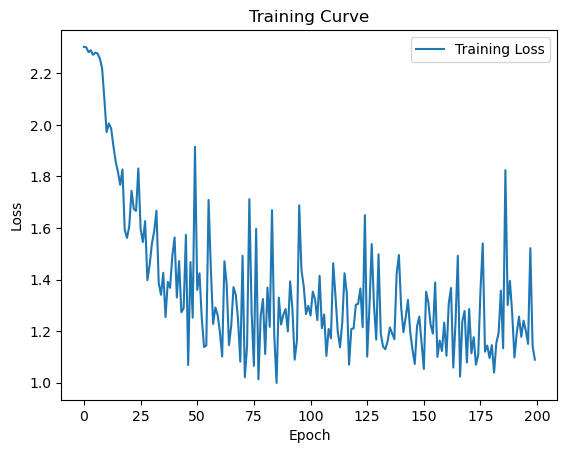

In [25]:
plot_losses(training_loss) # to plot the training loss

In [26]:
eval_train(X_train_tensor,y_train_tensor,model_trained) # to evaluate the model on the training set

Training Accuracy: 60.33%


## 3.2 RBF Vs Adversarial

### Test set for original images

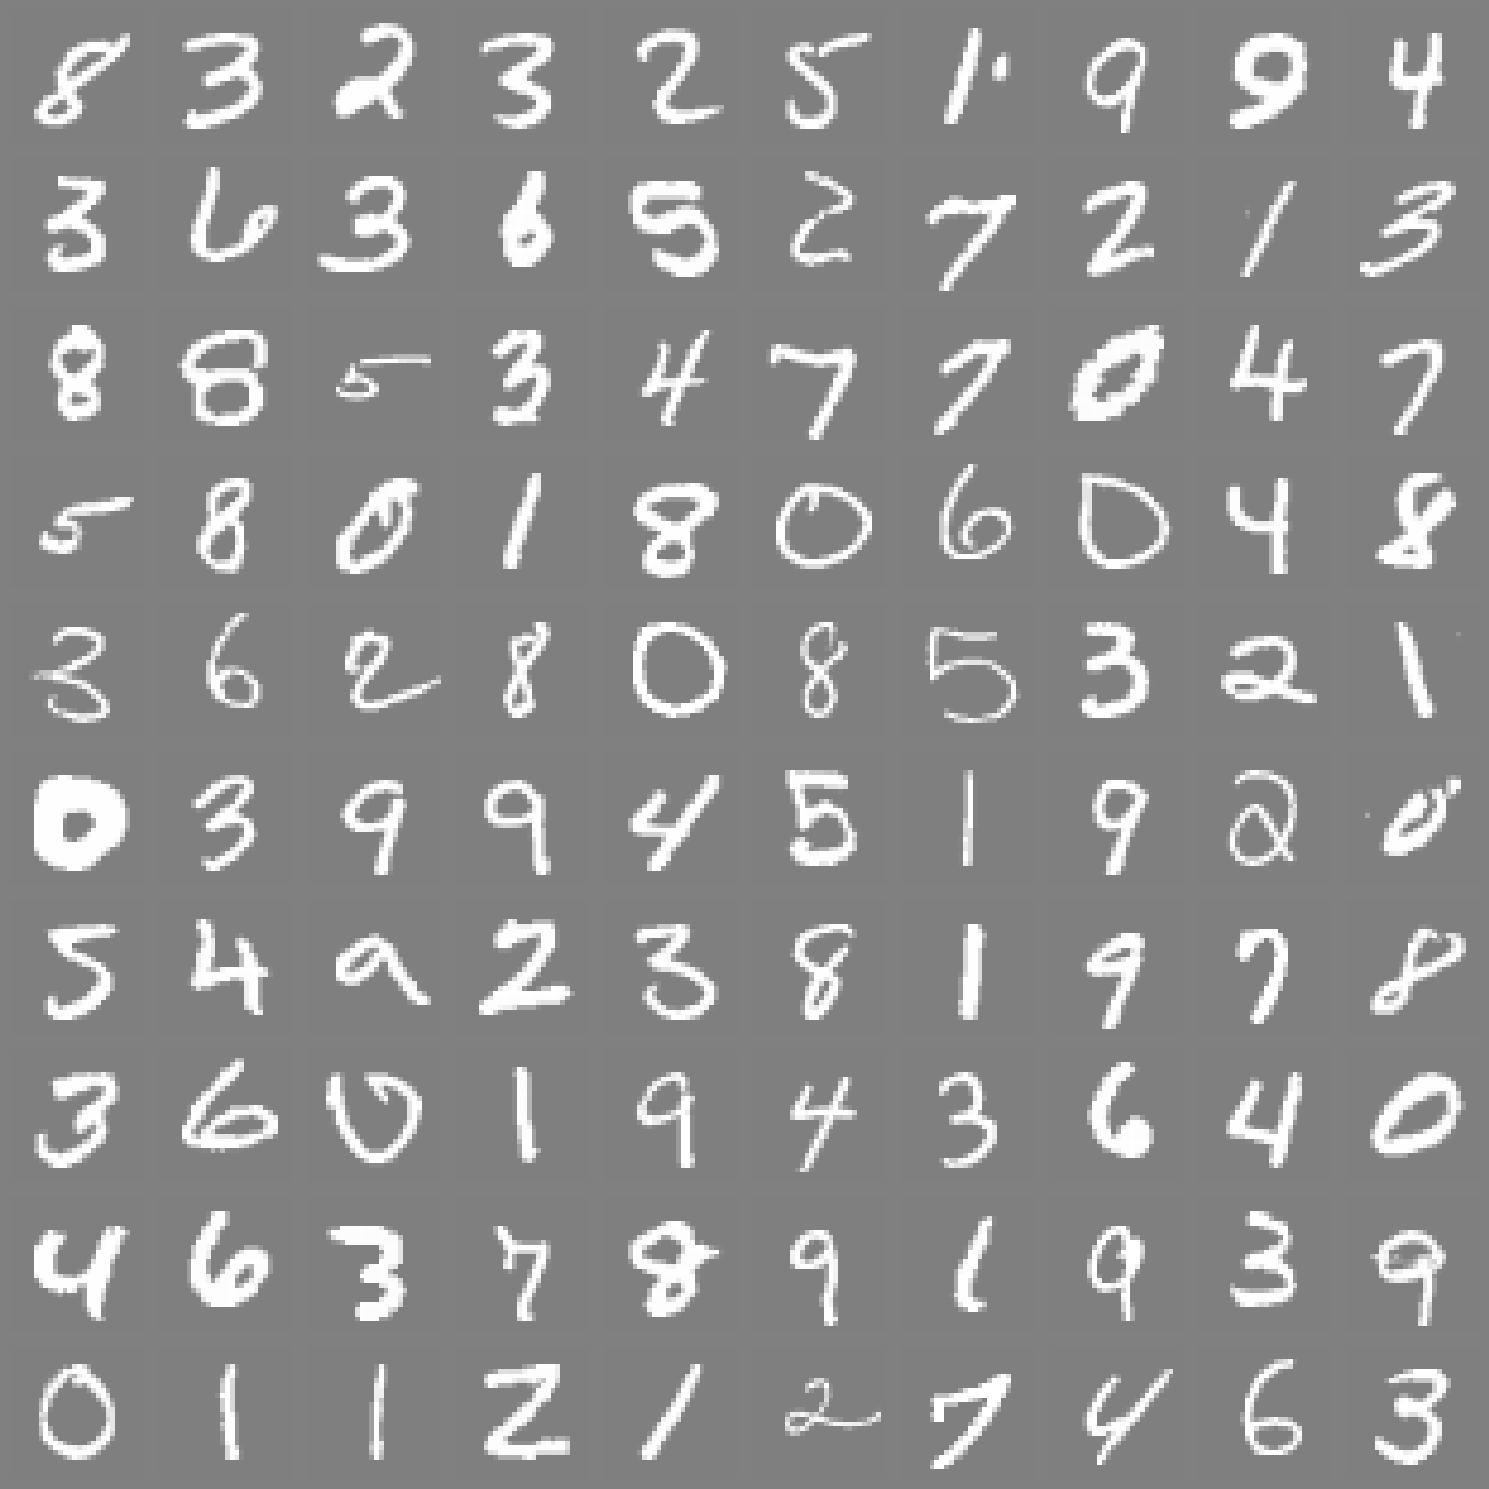

In [27]:
num_rows = 10
num_cols = 10
X_test_tensor2 = X_test_tensor.detach().numpy()
visualize_data(num_rows,num_cols,X_test_tensor2) # to visualize the test data


### Evaluation of the model on the unaltered test set


In [28]:
eval_test(X_test_tensor,y_test_tensor,model)

Accuracy: 60.90%
Mean Confidence for All Examples: 0.5603
Mean Confidence for Incorrect Predictions: 0.4155


### Creation of the adversarial test set


In [30]:
eps = 0.25
X_test_tensor_adv = create_adv_test(model_trained,X_test_tensor,y_test_tensor,eps,criterion) # to create the adversarial test set

### Visualization of the altered test set


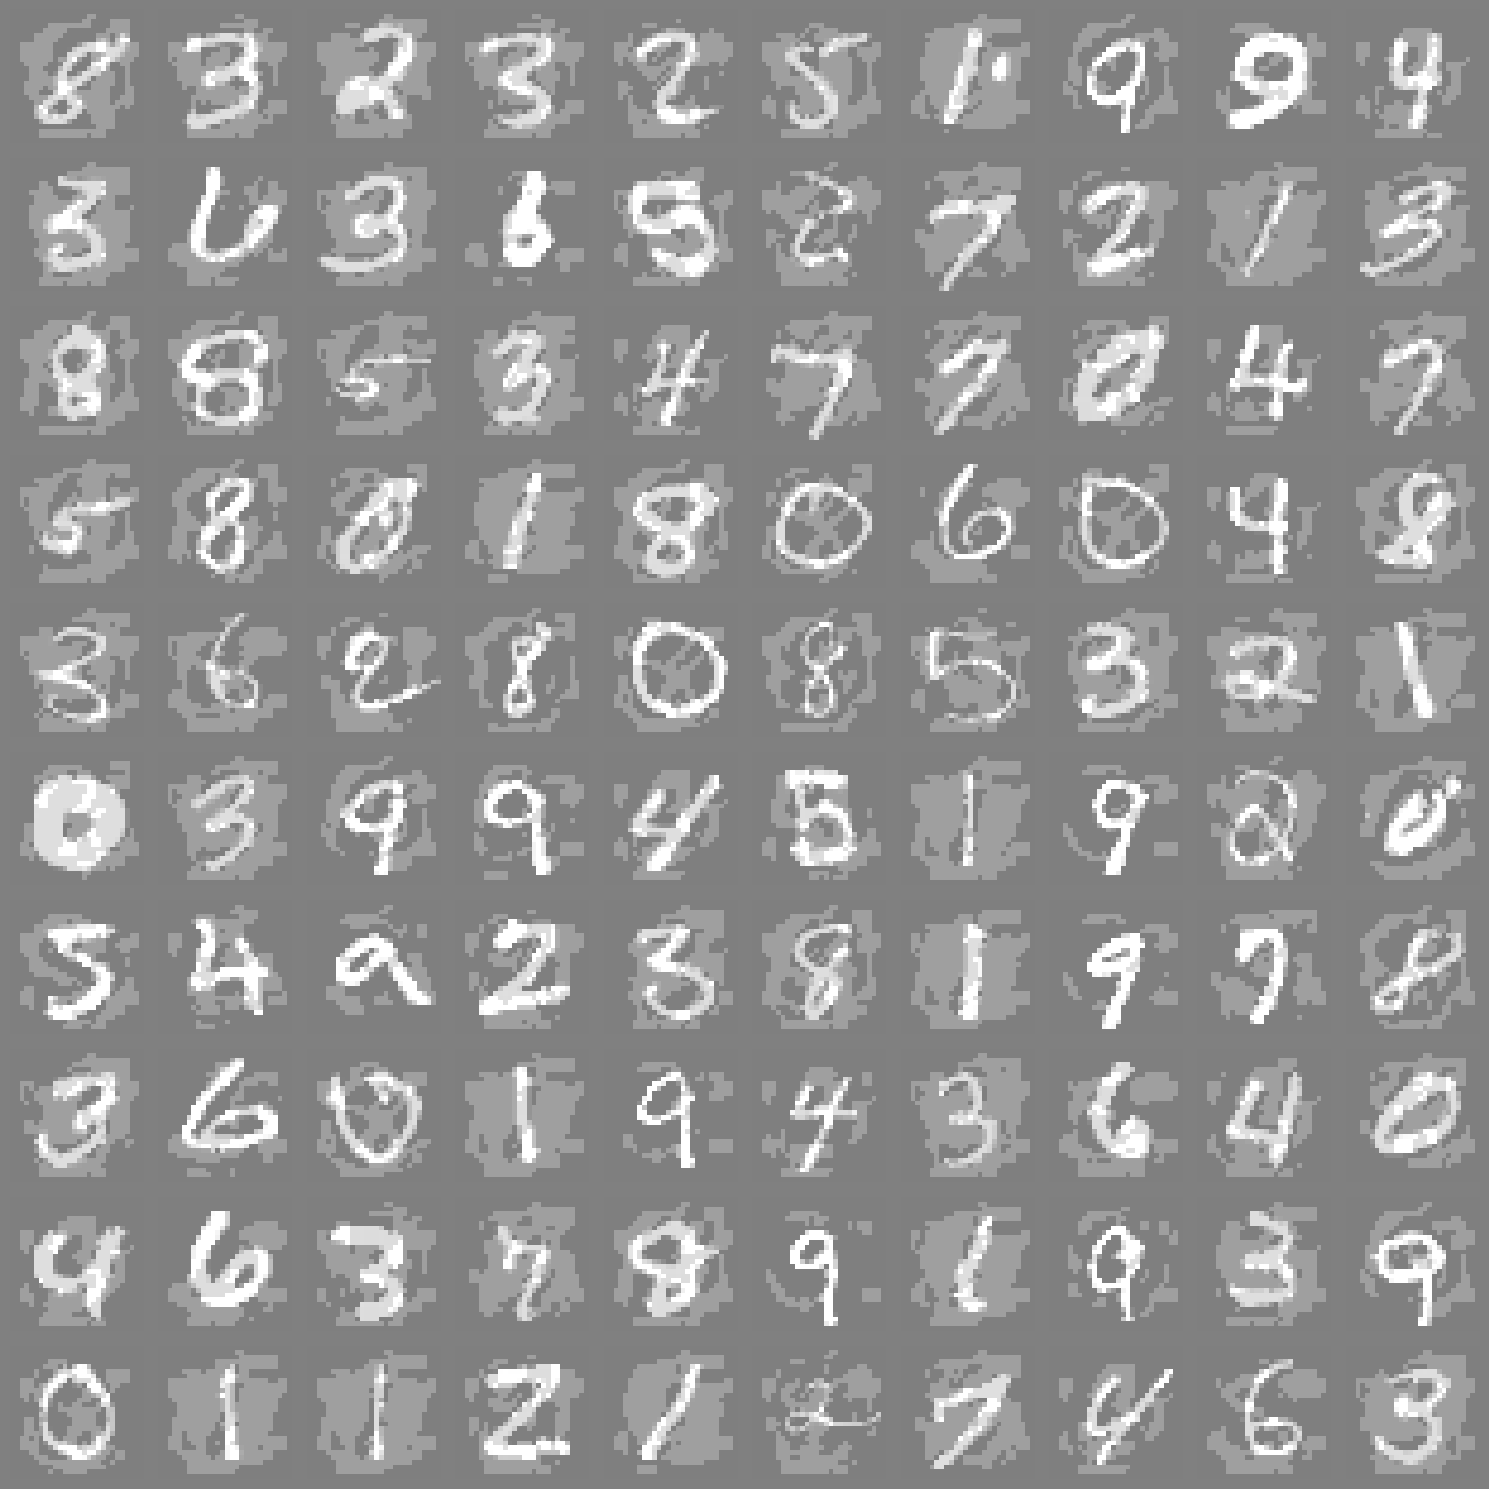

In [31]:
X_test_tensor_adv2 = X_test_tensor_adv.detach().numpy()
visualize_data(num_rows,num_cols,X_test_tensor_adv2) # to visualize the adversarial test set

### Evaluation of the model on the altered test set


In [32]:
eval_test(X_test_tensor_adv,y_test_tensor,model)

Accuracy: 0.25%
Mean Confidence for All Examples: 0.5454
Mean Confidence for Incorrect Predictions: 0.5458


# 4/ Work on generalization

## 4.1 Shallow Maxout Network with Softmax

In [34]:
from generalization.utils_gen import extract_from_mnist, visualize_data
from generalization.train_gen import prep_data,create_model,training_loop,eval_test,eval_train, plot_losses,visualize_weights_and_signs,test_eps,plot_eps
from generalization.adv_attack_gen import adv_attack,create_adv_test
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_openml
from generalization.ADV_generalize import adv_attack, test_Maxout, training_loop_Maxout, eval_test_Maxout

import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import DataLoader, TensorDataset
from torch.autograd import Variable

from sklearn.model_selection import train_test_split
from matplotlib.colors import LinearSegmentedColormap
from sklearn.preprocessing import LabelEncoder
from generalization.maxout_gen import MaxoutNetworkWithSoftmax

### Data extraction

In [36]:
data = extract_from_mnist()

Filtered dataset shape: (20000, 785)
Labels: 0        8
1        4
2        8
3        7
4        7
        ..
19995    8
19996    3
19997    1
19998    7
19999    6
Name: target, Length: 20000, dtype: int64


### Data prep and model creation

In [37]:
X_train_tensor,y_train_tensor,X_test_tensor,y_test_tensor,num_classes = prep_data(data)

Unique classes in target labels: 10


In [38]:
List_arg_not4 = [i for i in range(y_test_tensor.shape[0]) if y_test_tensor[i] != 4]

X_test_tensor = torch.tensor(np.delete(X_test_tensor, List_arg_not4, axis=0), dtype=torch.float32)
y_test_tensor = torch.tensor(np.delete(y_test_tensor, List_arg_not4), dtype=torch.long)
X_test_tensor_tri = X_test_tensor[0,:]
y_test_tensor_tri = torch.tensor([4], dtype=torch.long)

/tmp/ipykernel_21637/4265313002.py:3: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_test_tensor = torch.tensor(np.delete(X_test_tensor, List_arg_not4, axis=0), dtype=torch.float32)
/tmp/ipykernel_21637/4265313002.py:4: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_test_tensor = torch.tensor(np.delete(y_test_tensor, List_arg_not4), dtype=torch.long)


In [39]:
# Hyperparameters
batch_size = 128
n_epochs = 100
lr = 0.001

In [40]:
# Create TensorDatasets for training and testing sets
training_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

# Create DataLoaders for training and testing sets
training_dataloader = DataLoader(training_dataset, batch_size=batch_size, shuffle=True)
test_dataloader = DataLoader(test_dataset, batch_size=batch_size, shuffle=True)


In [41]:
model, criterion, optimizer = create_model(MaxoutNetworkWithSoftmax)

### Training loop

In [42]:
training_loss ,model_trained = training_loop_Maxout(optimizer, model, criterion, X_train_tensor, y_train_tensor,num_epochs=n_epochs,batch_size=batch_size)

Epoch [1/100], Loss: 2.0493
Epoch [2/100], Loss: 1.8396
Epoch [3/100], Loss: 1.6748
Epoch [4/100], Loss: 1.5331
Epoch [5/100], Loss: 1.4069
Epoch [6/100], Loss: 1.2654
Epoch [7/100], Loss: 1.2062
Epoch [8/100], Loss: 1.0608
Epoch [9/100], Loss: 0.9496
Epoch [10/100], Loss: 0.8678
Epoch [11/100], Loss: 0.8062
Epoch [12/100], Loss: 0.8114
Epoch [13/100], Loss: 0.7226
Epoch [14/100], Loss: 0.7075
Epoch [15/100], Loss: 0.6847
Epoch [16/100], Loss: 0.6604
Epoch [17/100], Loss: 0.5838
Epoch [18/100], Loss: 0.5933
Epoch [19/100], Loss: 0.6484
Epoch [20/100], Loss: 0.6250
Epoch [21/100], Loss: 0.5880
Epoch [22/100], Loss: 0.5799
Epoch [23/100], Loss: 0.6294
Epoch [24/100], Loss: 0.5034
Epoch [25/100], Loss: 0.5139
Epoch [26/100], Loss: 0.5254
Epoch [27/100], Loss: 0.4526
Epoch [28/100], Loss: 0.5108
Epoch [29/100], Loss: 0.5907
Epoch [30/100], Loss: 0.5829
Epoch [31/100], Loss: 0.5094
Epoch [32/100], Loss: 0.4604
Epoch [33/100], Loss: 0.4901
Epoch [34/100], Loss: 0.4556
Epoch [35/100], Loss: 0

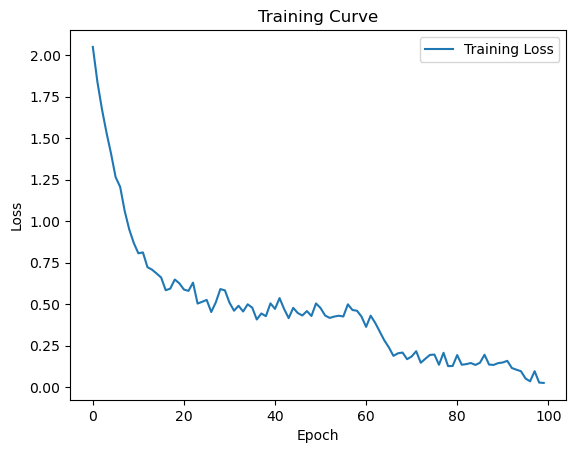

In [43]:
plot_losses(training_loss)

In [45]:
eval_test_Maxout(X_test_tensor,y_test_tensor,model)

Accuracy: 97.52%
Mean Confidence for All Examples: 0.8902
Mean Confidence for Incorrect Predictions: 0.8921


### Creation of the adversarial test set and test evaluation of the Neural Network on the different adversarial examples

In [46]:
input_size = 784
num_classes = 10
device = torch.device("cpu")

# Define the model
model = MaxoutNetworkWithSoftmax(input_size, num_classes)

model = model.to(device)

# Run test for each epsilon

args, eps = test_eps(test_Maxout,model, device, test_dataloader)

arg softmax : tensor([[0.4542, 0.2984, 0.0000,  ..., 0.2818, 0.2789, 0.0000],
        [0.4241, 0.3277, 0.0000,  ..., 0.2227, 0.3467, 0.0000],
        [0.5725, 0.5283, 0.0000,  ..., 0.2737, 0.4103, 0.0492],
        ...,
        [0.4741, 0.0000, 0.0000,  ..., 0.2284, 0.1979, 0.0225],
        [0.5891, 0.3558, 0.0000,  ..., 0.4809, 0.3307, 0.1615],
        [0.3503, 0.1096, 0.0000,  ..., 0.5643, 0.2122, 0.2542]],
       grad_fn=<ReluBackward0>)
output : torch.Size([128, 10])
arg softmax : tensor([[0.4505, 0.2257, 0.0000,  ..., 0.7261, 0.2850, 0.0000],
        [0.3350, 0.0912, 0.0000,  ..., 0.3457, 0.3294, 0.0000],
        [0.5496, 0.0674, 0.0000,  ..., 0.2423, 0.1257, 0.0000],
        ...,
        [0.3768, 0.2586, 0.1254,  ..., 0.3601, 0.2883, 0.0081],
        [0.6113, 0.0999, 0.1763,  ..., 0.6943, 0.3846, 0.0000],
        [0.3916, 0.1807, 0.0000,  ..., 0.2732, 0.3892, 0.0173]],
       grad_fn=<ReluBackward0>)
output : torch.Size([128, 10])
arg softmax : tensor([[0.4109, 0.0886, 0.0000,  ..

/home/spi-2019/Téléchargements/Tpworkspace/MLA_proj/generalization/train_gen.py:125: RuntimeWarning: invalid value encountered in log
  args[i] = np.log(args[i]) - np.log(np.sum(np.exp(args[i]), axis=1, keepdims=True))


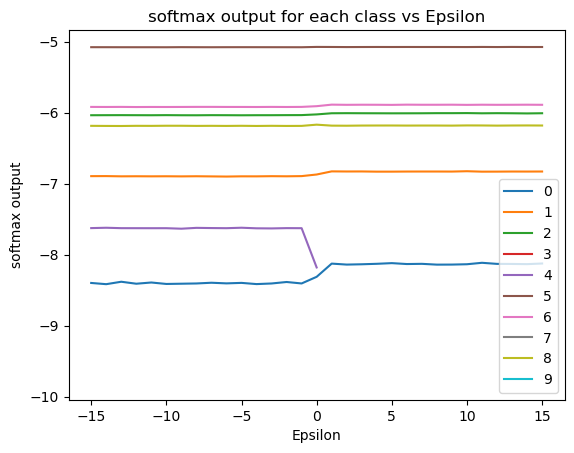

In [47]:
plot_eps(args,eps)

## 4.2.1 Deep maxout network


In [48]:
from generalization.utils_gen import extract_from_mnist, visualize_data
from generalization.train_gen import prep_data,create_model,training_loop,eval_test,eval_train, plot_losses,visualize_weights_and_signs,create_model_2,create_model_3,create_model_4
from generalization.adv_attack_gen import adv_attack,create_adv_test
from generalization.RBF_architecture import ShallowRBF
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_openml
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import pandas as pd
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
from matplotlib.colors import LinearSegmentedColormap
from sklearn.preprocessing import LabelEncoder
#DEFINE CUSTOM MAXOUT MODELS
from generalization.needed_archi import MaxoutLayer, DeepMaxoutNetwork, ShallowSoftmaxNetBN



### Data Extraction


In [49]:
data2 = extract_from_mnist()

Filtered dataset shape: (20000, 785)
Labels: 0        8
1        4
2        8
3        7
4        7
        ..
19995    8
19996    3
19997    1
19998    7
19999    6
Name: target, Length: 20000, dtype: int64


### Data preparation and model creation


In [50]:
X_train_tensor,y_train_tensor,X_test_tensor,y_test_tensor,num_classes = prep_data(data2)

Unique classes in target labels: 10


In [51]:
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, 64, shuffle=True)

In [52]:
deep_maxout_model,criterion,optimizer, num_epochs, Batch_size = create_model_2(DeepMaxoutNetwork,X_train_tensor)
 


### Training loop

In [53]:
training_loss ,model_trained = training_loop(optimizer, deep_maxout_model , criterion, X_train_tensor, y_train_tensor,num_epochs=num_epochs,batch_size=Batch_size)

Epoch [1/100], Loss: 0.7584
Epoch [2/100], Loss: 0.5969
Epoch [3/100], Loss: 0.6308
Epoch [4/100], Loss: 0.3682
Epoch [5/100], Loss: 0.4019
Epoch [6/100], Loss: 0.2920
Epoch [7/100], Loss: 0.3362
Epoch [8/100], Loss: 0.1482
Epoch [9/100], Loss: 0.2598
Epoch [10/100], Loss: 0.2287
Epoch [11/100], Loss: 0.3723
Epoch [12/100], Loss: 0.2735
Epoch [13/100], Loss: 0.1915
Epoch [14/100], Loss: 0.3785
Epoch [15/100], Loss: 0.2065
Epoch [16/100], Loss: 0.5275
Epoch [17/100], Loss: 0.3172
Epoch [18/100], Loss: 0.2585
Epoch [19/100], Loss: 0.4017
Epoch [20/100], Loss: 0.2778
Epoch [21/100], Loss: 0.3458
Epoch [22/100], Loss: 0.2927
Epoch [23/100], Loss: 0.2960
Epoch [24/100], Loss: 0.3047
Epoch [25/100], Loss: 0.3439
Epoch [26/100], Loss: 0.3101
Epoch [27/100], Loss: 0.2358
Epoch [28/100], Loss: 0.3664
Epoch [29/100], Loss: 0.4385
Epoch [30/100], Loss: 0.3304
Epoch [31/100], Loss: 0.3807
Epoch [32/100], Loss: 0.4560
Epoch [33/100], Loss: 0.2189
Epoch [34/100], Loss: 0.3335
Epoch [35/100], Loss: 0

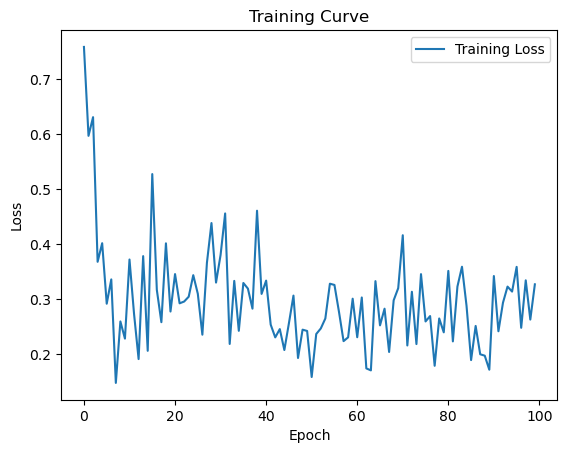

In [54]:
plot_losses(training_loss) # to plot the training loss


## 4.2.2 Deep Maxout Vs Adversarial



Test set for original images


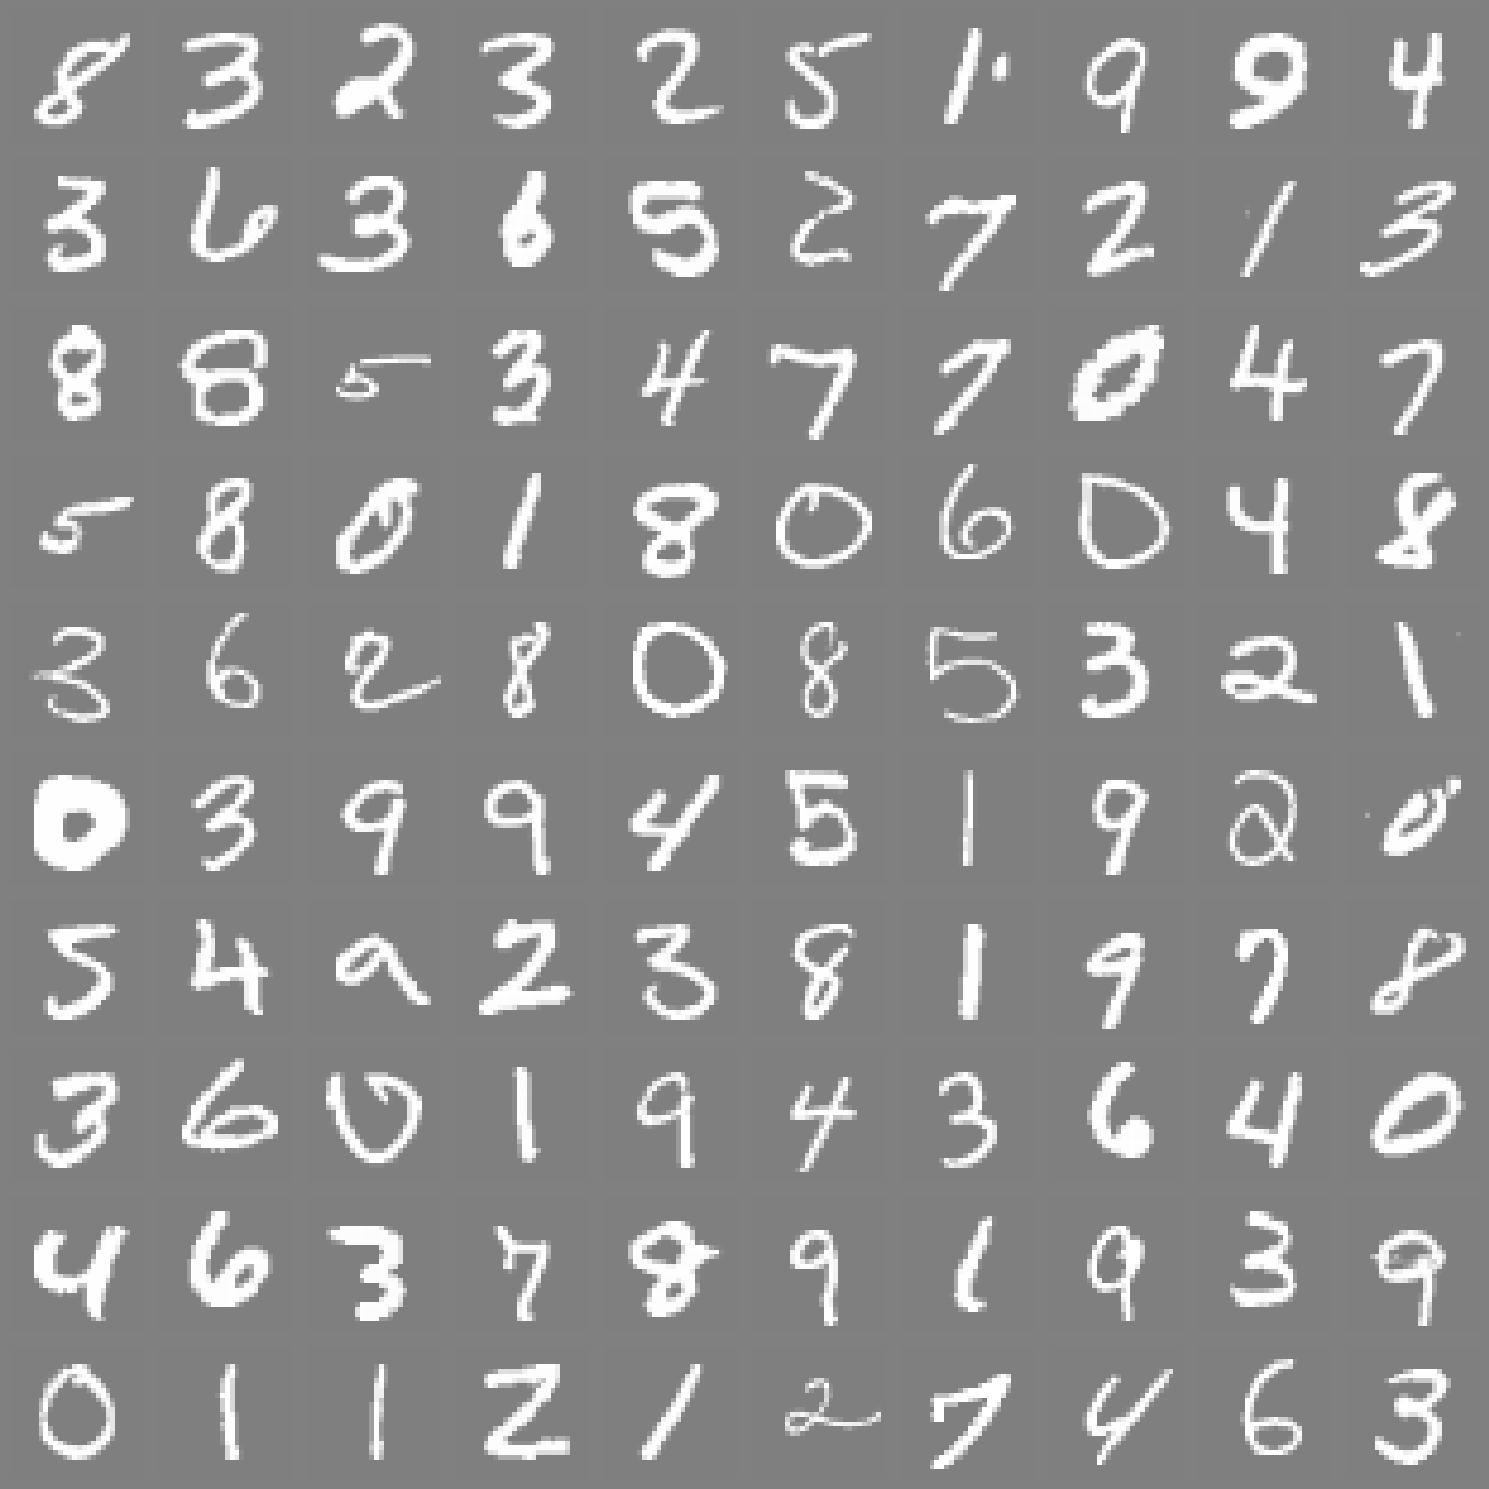

In [55]:
X_test_tensor2 = X_test_tensor.detach().numpy()
visualize_data(num_rows,num_cols,X_test_tensor2) # to visualize the test data


Evaluation of the model on the unaltered test set


In [56]:
wrong_preds_maxout, correct_preds_maxout,all_preds_maxout  =eval_test(X_test_tensor,y_test_tensor,deep_maxout_model) # to evaluate the model on the test set

Accuracy: 92.20%
Mean Confidence for All Examples: 0.8849
Mean Confidence for Incorrect Predictions: 0.6037



Creation of the adversarial test set


In [57]:
eps = 0.25
X_test_tensor_adv = create_adv_test(model_trained,X_test_tensor,y_test_tensor,eps,criterion) # to create the adversarial test set

/home/spi-2019/Téléchargements/Tpworkspace/MLA_proj/generalization/adv_attack_gen.py:36: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  alt_im_norm =torch.tensor(alt_im, dtype=torch.float32)



Visualization of the altered test set

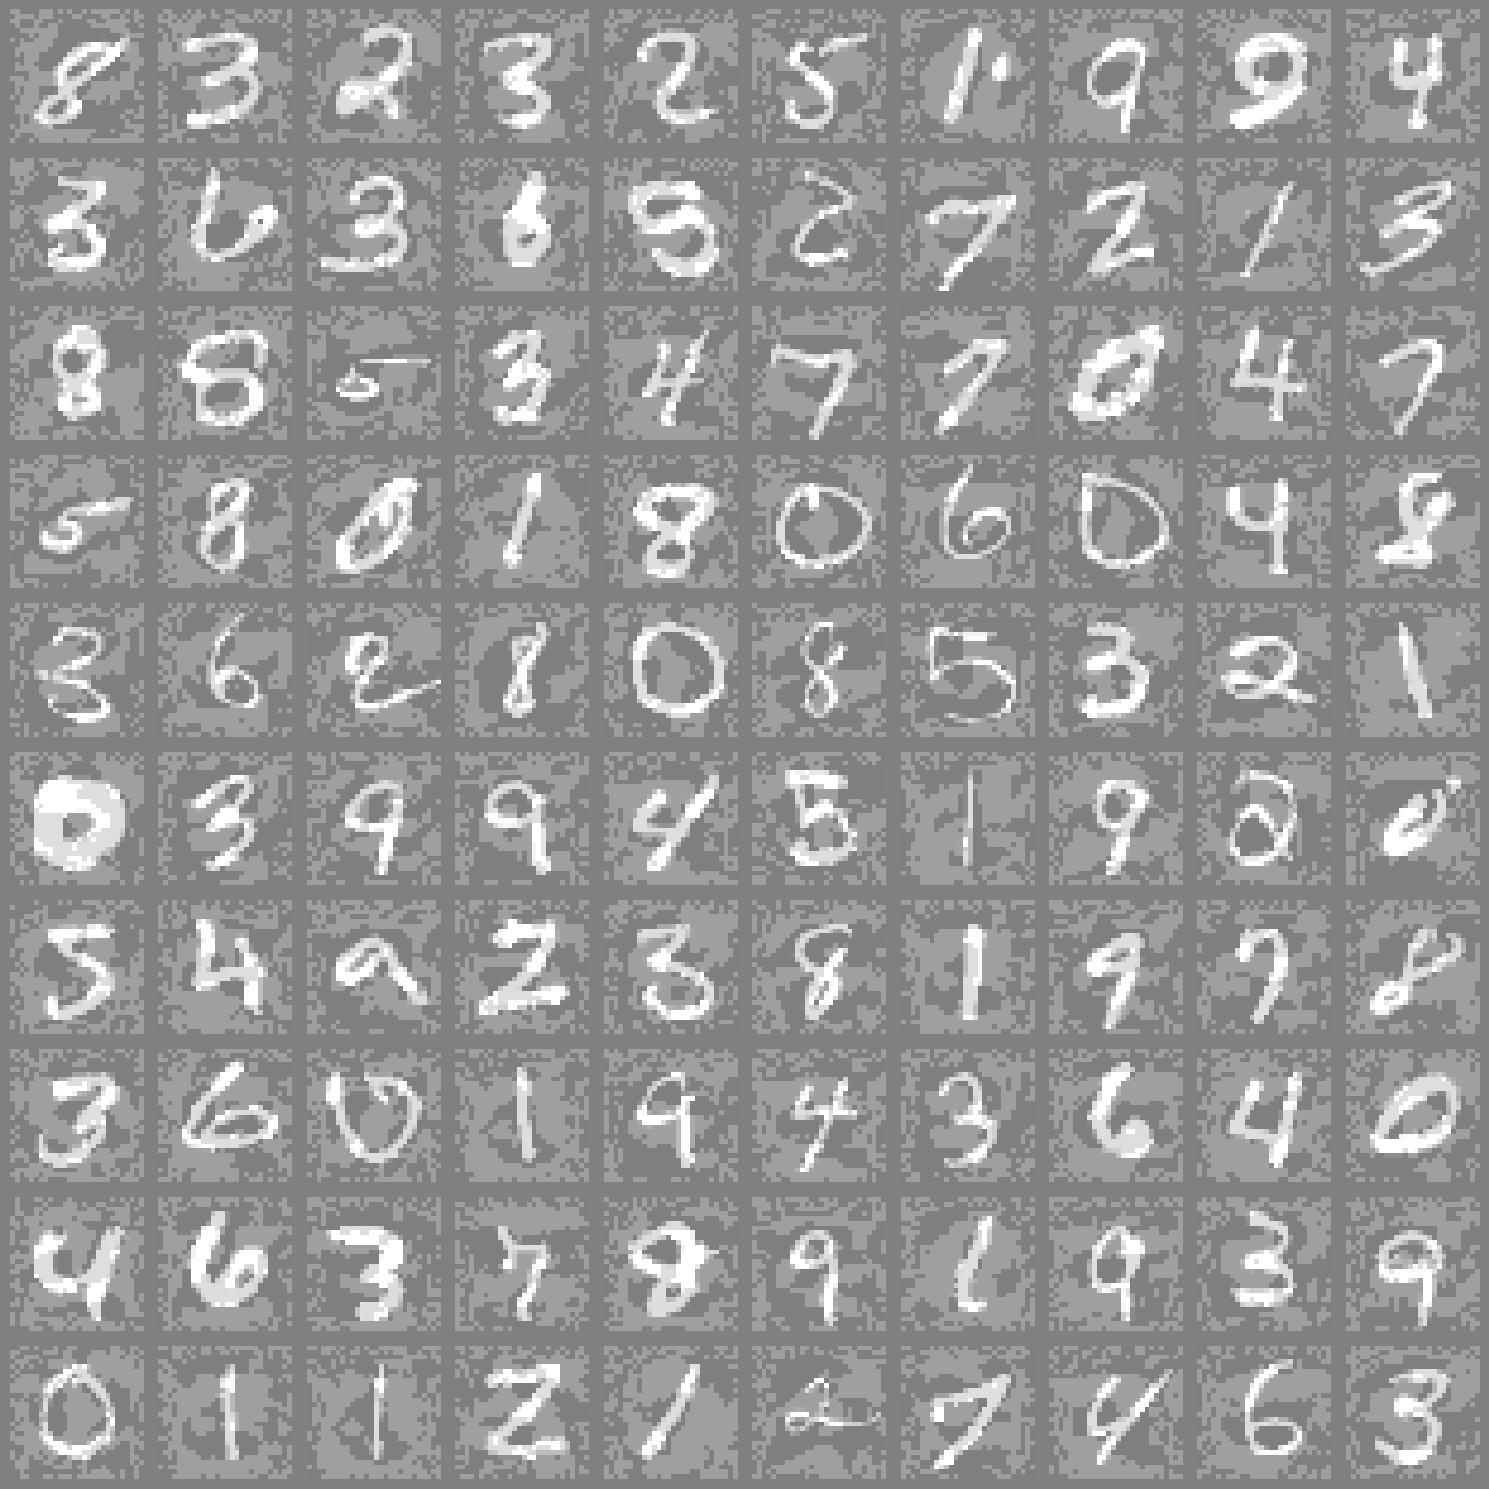

In [58]:
X_test_tensor_adv2 = X_test_tensor_adv.detach().numpy()
visualize_data(num_rows,num_cols,X_test_tensor_adv2) # to visualize the adversarial test set


Evaluation of the model on the altered test set


In [59]:
wrong_preds_maxout_adv, correct_preds_maxout_adv,all_preds_maxout_adv   = eval_test(X_test_tensor_adv,y_test_tensor,deep_maxout_model) # to evaluate the model on the adversarial test set

Accuracy: 0.83%
Mean Confidence for All Examples: 0.7375
Mean Confidence for Incorrect Predictions: 0.7396


## 4.2.3 Shallow RBF


In [61]:
batch_images,batch_labels= next(iter(train_loader))
centers = batch_images

Model creation

In [62]:
RBF_model,criterion,optimizer, num_epochs, Batch_size = create_model_3(ShallowRBF,X_train_tensor,centers)

Training loop

In [63]:
training_loss_RBF ,model_trained_RBF = training_loop(optimizer, RBF_model , criterion, X_train_tensor, y_train_tensor,num_epochs=num_epochs,batch_size=Batch_size)

Epoch [1/100], Loss: 1.6644
Epoch [2/100], Loss: 1.3115
Epoch [3/100], Loss: 1.0866
Epoch [4/100], Loss: 1.0829
Epoch [5/100], Loss: 1.1015
Epoch [6/100], Loss: 0.9343
Epoch [7/100], Loss: 1.0059
Epoch [8/100], Loss: 1.0337
Epoch [9/100], Loss: 0.8418
Epoch [10/100], Loss: 0.9192
Epoch [11/100], Loss: 0.7981
Epoch [12/100], Loss: 1.0067
Epoch [13/100], Loss: 0.8008
Epoch [14/100], Loss: 0.8808
Epoch [15/100], Loss: 0.7942
Epoch [16/100], Loss: 0.8702
Epoch [17/100], Loss: 0.7637
Epoch [18/100], Loss: 0.8602
Epoch [19/100], Loss: 0.8245
Epoch [20/100], Loss: 0.7689
Epoch [21/100], Loss: 0.9870
Epoch [22/100], Loss: 0.7945
Epoch [23/100], Loss: 0.7327
Epoch [24/100], Loss: 0.7418
Epoch [25/100], Loss: 0.7744
Epoch [26/100], Loss: 0.7401
Epoch [27/100], Loss: 0.7057
Epoch [28/100], Loss: 1.0792
Epoch [29/100], Loss: 0.6443
Epoch [30/100], Loss: 0.9019
Epoch [31/100], Loss: 0.9620
Epoch [32/100], Loss: 0.6601
Epoch [33/100], Loss: 0.6011
Epoch [34/100], Loss: 0.6857
Epoch [35/100], Loss: 0

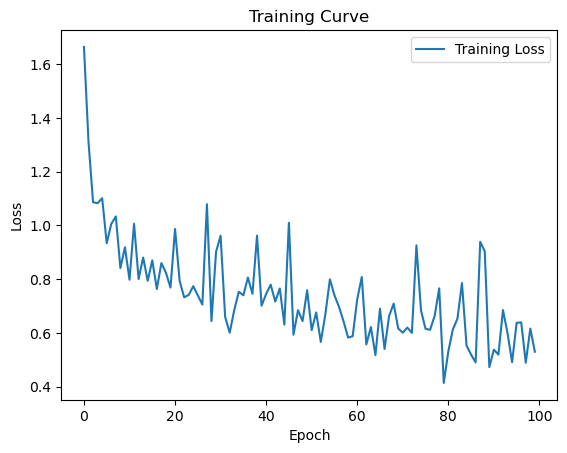

In [64]:
plot_losses(training_loss_RBF) # to plot the training loss

In [65]:
eval_train(X_train_tensor,y_train_tensor,model_trained_RBF) # to evaluate the model on the training set

Training Accuracy: 82.11%



Evaluation of the model on the unaltered test set


In [66]:
wrong_preds_RBF, correct_preds_RBF,all_preds_RBF  =eval_test(X_test_tensor,y_test_tensor,RBF_model) # to evaluate the model on the test set

Accuracy: 81.77%
Mean Confidence for All Examples: 0.7699
Mean Confidence for Incorrect Predictions: 0.5938



Evaluation of the model on the altered test set generated by the deep maxout


In [67]:

wrong_preds_RBF_adv, correct_preds_RBF_adv,all_preds_RBF_adv   =eval_test(X_test_tensor_adv,y_test_tensor,RBF_model) # to evaluate the RBF model on the adversarial test set generated by the maxout model

Accuracy: 8.70%
Mean Confidence for All Examples: 0.6914
Mean Confidence for Incorrect Predictions: 0.6869


## 4.2.3 Shallow Softmax

Model creation

In [68]:
ShallowSoftmax_model,criterion,optimizer, num_epochs, Batch_size = create_model_4(ShallowSoftmaxNetBN,X_train_tensor)

Training loop

In [69]:
training_loss_shallowsoft ,model_trained_shallowsoft = training_loop(optimizer, ShallowSoftmax_model , criterion, X_train_tensor, y_train_tensor,num_epochs=num_epochs,batch_size=Batch_size)

Epoch [1/100], Loss: 1.6677
Epoch [2/100], Loss: 1.6963
Epoch [3/100], Loss: 1.6713
Epoch [4/100], Loss: 1.6256
Epoch [5/100], Loss: 1.5650
Epoch [6/100], Loss: 1.5983
Epoch [7/100], Loss: 1.6038
Epoch [8/100], Loss: 1.5354
Epoch [9/100], Loss: 1.5674
Epoch [10/100], Loss: 1.5630
Epoch [11/100], Loss: 1.5385
Epoch [12/100], Loss: 1.5277
Epoch [13/100], Loss: 1.5781
Epoch [14/100], Loss: 1.5472
Epoch [15/100], Loss: 1.5507
Epoch [16/100], Loss: 1.5479
Epoch [17/100], Loss: 1.5846
Epoch [18/100], Loss: 1.5424
Epoch [19/100], Loss: 1.5748
Epoch [20/100], Loss: 1.5904
Epoch [21/100], Loss: 1.5659
Epoch [22/100], Loss: 1.5819
Epoch [23/100], Loss: 1.5411
Epoch [24/100], Loss: 1.5353
Epoch [25/100], Loss: 1.5516
Epoch [26/100], Loss: 1.5715
Epoch [27/100], Loss: 1.5904
Epoch [28/100], Loss: 1.5279
Epoch [29/100], Loss: 1.5827
Epoch [30/100], Loss: 1.5958
Epoch [31/100], Loss: 1.5624
Epoch [32/100], Loss: 1.5762
Epoch [33/100], Loss: 1.5837
Epoch [34/100], Loss: 1.5335
Epoch [35/100], Loss: 1

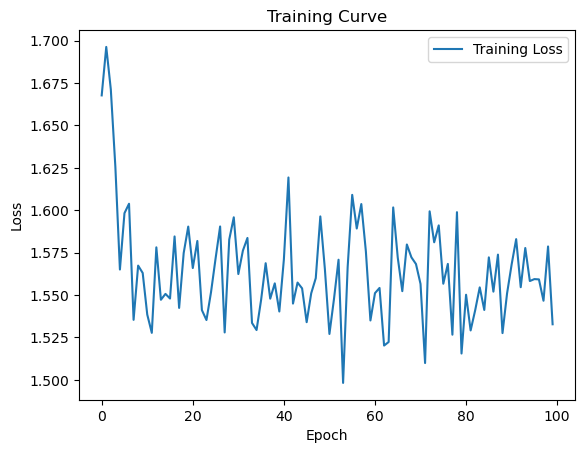

In [70]:
plot_losses(training_loss_shallowsoft) # to plot the training loss

In [71]:
eval_train(X_train_tensor,y_train_tensor,model_trained_shallowsoft) # to evaluate the model on the training set

Training Accuracy: 93.46%



Evaluation of the model on the unaltered test set


In [72]:
wrong_preds_shallowsoft, correct_preds_shallowsoft,all_preds_shallowsoft  = eval_test(X_test_tensor,y_test_tensor,model_trained_shallowsoft) # to evaluate the model on the test set

Accuracy: 91.07%
Mean Confidence for All Examples: 0.2235
Mean Confidence for Incorrect Predictions: 0.1896



Evaluation of the model on the altered test set generated by the deep maxout


In [73]:
wrong_preds_shallowsoft_adv, correct_preds_shallowsoft_adv, all_preds_shallowsoft_adv  =eval_test(X_test_tensor_adv,y_test_tensor,model_trained_shallowsoft) # to evaluate the RBF model on the adversarial test set generated by the maxout model

Accuracy: 2.97%
Mean Confidence for All Examples: 0.2056
Mean Confidence for Incorrect Predictions: 0.2061



Calculation of the similar prediction's percentages between the different neural networks implemented


In [74]:
# Count the total number of adversarial examples where both Maxout networks and the RBF network made wrong predictions
same_wrong_preds = sum(wrong_preds_maxout_adv[i] == wrong_preds_RBF_adv[i] for i in range(min(len(wrong_preds_maxout_adv), len(wrong_preds_RBF_adv))))

# Count the total number of adversarial examples
total_examples = min(len(wrong_preds_maxout_adv), len(wrong_preds_RBF_adv))

# Calculate the percentage
percentage_same_wrong_preds = (same_wrong_preds / total_examples) * 100

print("On missclassified examples : Percentage of how many times the shallow RBF predicts the maxouts class :")
print(percentage_same_wrong_preds)


On missclassified examples : Percentage of how many times the shallow RBF predicts the maxouts class :
12.568455640744796


In [75]:
# Count the total number of adversarial examples where both Maxout networks and the RBF network made wrong predictions
same_wrong_preds2 = sum(wrong_preds_maxout_adv[i] == wrong_preds_shallowsoft_adv[i] for i in range(min(len(wrong_preds_maxout_adv), len(wrong_preds_shallowsoft_adv))))

# Count the total number of adversarial examples
total_examples2 = min(len(wrong_preds_maxout_adv), len(wrong_preds_shallowsoft_adv))

# Calculate the percentage
percentage_same_wrong_preds2 = (same_wrong_preds2 / total_examples2) * 100

print("On missclassified examples : Percentage of how many times the shallow softmax predicts the maxouts class :")
print(percentage_same_wrong_preds2)

On missclassified examples : Percentage of how many times the shallow softmax predicts the maxouts class :
14.58387013656274


In [76]:
# Count the total number of adversarial examples where both Maxout networks and the RBF network made wrong predictions
same_all_preds_mrbf = sum(all_preds_maxout_adv[i] == all_preds_RBF_adv[i] for i in range(min(len(wrong_preds_maxout_adv), len(wrong_preds_RBF_adv))))

# Count the total number of adversarial examples
total_ex_all_mrbf = min(len(all_preds_maxout_adv), len(all_preds_RBF_adv))

# Calculate the percentage
percentage_same_all_preds_mrbf = (same_all_preds_mrbf / total_ex_all_mrbf) * 100

print("Percentage of how many times the RBF predicts the maxouts class :")
print(percentage_same_all_preds_mrbf)


Percentage of how many times the RBF predicts the maxouts class :
38.025


In [77]:
# Count the total number of adversarial examples where both Maxout networks and the RBF network made wrong predictions
same_all_preds_SFrbf = sum(all_preds_RBF_adv[i] == all_preds_shallowsoft_adv[i] for i in range(min(len(wrong_preds_RBF_adv), len(all_preds_shallowsoft_adv))))

# Count the total number of adversarial examples
total_ex_all_SFrbf = min(len(all_preds_RBF_adv), len(all_preds_shallowsoft_adv))

# Calculate the percentage
percentage_same_all_preds_SFrbf = (same_all_preds_SFrbf / total_ex_all_SFrbf) * 100

print("Percentage of how many times the RBF predicts the softmaxs class :")
print(percentage_same_all_preds_SFrbf)


Percentage of how many times the RBF predicts the softmaxs class :
37.125
